In [4]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import sklearn as sk

In [77]:
from sklearn.base import BaseEstimator,ClassifierMixin
class linear(BaseEstimator,ClassifierMixin):
    '''Classifieur linéaire de R^n -> R'''
    def __init__(self, lam = 0.1, eps = 0.001, dec = 1, ite = 1000, rand = np.random.RandomState()):
        self.lam = lam
        self.eps = eps
        self.dec = dec
        self.ite = ite
        self.rand = rand
        self.ini = False
        
    def init(self, n):
        self.param = self.rand.rand(n+1) *2 -1
        self.gradHisto = np.zeros((1, n+1))
        self.ini = True
    
    def fit(self, x, y, debug = False):
        if len(x.shape) == 1 :
            x = x.reshape((1,x.size))
        if self.ini == False :
            self.init(x.shape[1])
        x = np.concatenate((np.ones((x.shape[0],1)), x),1)
        '''ajout du biais'''
        for it in range(self.ite):
            n = self.rand.randint(0,x.shape[0])
            #delta = -2 * x[n] * y[n] + np.dot((np.dot(2 * x[n].T, x[n])), self.param).T + self.lam * np.sign(self.param)
            delta = -2 * x[n] * y[n] + x[n]*2*np.dot(x[n],self.param) + self.lam * np.sign(self.param)
            self.gradHisto = np.concatenate((self.gradHisto, delta.reshape((1, -1))))
            param2 = self.param - self.eps * delta
            '''self.param = self.param - self.eps * delta'''
            self.eps = self.eps * self.dec
            if debug and it%(self.ite//10) == 0 :
                print(np.mean((y-np.dot(x, self.param)) * (y-np.dot(x, self.param))))
            for i in range(x.shape[1]):
                if (self.param[i] * param2[i]) < 0:
                    self.param[i] = 0
                else :
                    self.param[i] = param2[i]         
                
    def predict(self, x):
        if len(x.shape) == 1 :
            x = x.reshape((1,x.size))
        if not self.ini:
            self.init(x.shape[1])
        x = np.concatenate((np.ones((x.shape[0],1)), x),1)
        return np.rint(np.dot(x, self.param))

In [78]:
from sklearn import datasets
from sklearn import metrics
from sklearn import cross_validation
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [111]:
c = linear(0, 0.001, 1, 10000)
c.fit(X, y, True)

0.687020247513
0.109179424385
0.0922460988456
0.0811985420925
0.0729734217549
0.0678061447033
0.0684885019801
0.0576916036068
0.0671194268498
0.0534263366108


In [112]:
print(c.predict(X), y)

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0.  0. -0. -0. -0.  0.
  0.  0.  0.  0. -0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0. -0.  0. -0.
 -0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  2.  1.
  1.  1.  2.  1.  1.  1.  1.  1.  1.  2.  1.  1.  2.  1.  2.  1.  2.  1.
  2.  1.  1.  1.  1.  2.  2.  1.  1.  1.  1.  2.  2.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.] [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [113]:
c.gradHisto[-10:-1]

array([[ 0.73847865,  4.43087189,  2.14158808,  3.32315392,  1.10771797],
       [-0.23488359, -1.47976659, -0.79860419, -1.31534808, -0.5637206 ],
       [-0.16821693, -0.87472805, -0.58875926, -0.2523254 , -0.03364339],
       [-0.35385551, -1.84004864, -1.45080758, -0.53078326, -0.03538555],
       [-0.21170169, -1.35489084, -0.59276474, -1.18552949, -0.44457356],
       [-0.61675083, -3.63882992, -1.8502525 , -3.14542925, -1.1101515 ],
       [-0.12733679, -0.94229226, -0.35654302, -0.77675443, -0.24193991],
       [-0.50549986, -3.48794906, -1.56704958, -2.57804931, -1.16264969],
       [-0.18660806, -0.85839708, -0.67178902, -0.18660806, -0.03732161]])

In [114]:
c.param

array([ 0.52076474, -0.13820785, -0.10822612,  0.36866622,  0.31012005])

In [115]:
c.eps

0.001

In [116]:
c = linear(0, 0.001, 0.999999, 10000)
cross_validation.cross_val_score(c, X, y, cv=5, scoring="accuracy")

array([ 0.93333333,  0.93333333,  0.93333333,  0.86666667,  0.96666667])

Bon l'algo converge mais les performances sont très moyenne, peut être parce que les données ne sont pas linéairement séparable mais je penche plutôt sur mon algo.

In [117]:
for i in np.arange(0,1.1,0.1):
    c = linear(i, 0.001, 0.999999, 10000)
    print(np.mean(cross_validation.cross_val_score(c, X, y, cv=5, scoring="accuracy")))

0.946666666667
0.946666666667
0.906666666667
0.886666666667
0.866666666667
0.86
0.853333333333
0.833333333333
0.826666666667
0.793333333333
0.786666666667


On peut voir que les performances diminuent nettement avec l'augmentation de lambda, le modèle préférant limiter la taille de ses paramètres que les erreurs.

In [130]:
a = []
s = []
for i in np.arange(0,10,1):
    c = linear(i, 0.001, 0.9999999, 10000)
    a.append(np.mean(cross_validation.cross_val_score(c, X, y, cv=5, scoring="accuracy")))
    '''cross_validation fais une copie du module, on est obligé de faire le fit nous même'''
    c.fit(X, y)
    s.append(c.param[c.param == 0].size)

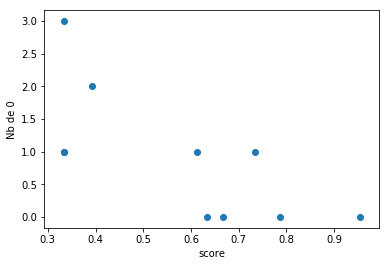

In [131]:
plt.scatter(a,s)
plt.ylabel("Nb de 0")
plt.xlabel("score")
plt.show()

In [132]:
c = linear(100, 0.001, 1, 10000)
c.fit(X, y, True)
c.param

13.9008476325
1.67145059056
1.39373826139
1.67132147955
1.39185806394
1.38158482891
1.38431183625
1.67644135316
1.53807398685
1.55261211478


array([ 0.        ,  0.02607279,  0.        ,  0.        ,  0.        ])